# Classical Statistical Inference: Bootstrap and Jacknife

## Table of Content

- II. What is statistical inference ? See [Frequentist_inference_01.ipynb](Frequentist_inference_01.ipynb)
    * II.3 Hypothesis testing See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb)
    * II.4 Uncertainty calculation using Monte-Carlo method. See [Frequentist_inference_Monte_Carlo.ipynb](Frequentist_inference_Monte_Carlo.ipynb)
    * II.5 Bootstrap:
       - [II.5.1 Bootstrap confidence interval](#II.5.1-Bootsrap-confidence-interval) 
       - [II.5.2 Jacknife](#II.5.2-Jacknife)     
    
- X. [References and supplementary material](#X)

## II.5 Bootstrap

The bootstrap is a method for estimating standard error (and confidence intervals on some statistical quantities / aka statistics) using your observed sample of random variable to estimate the population distribution of your statistics. 

Imagine that you have a random variable $x$, and have n measurements $\{x_i\}$ of it. Then you may want to measure some statistics (let's say $q = g(x_1, ..., x_n)$) of the pdf of $x$ (e.g. its mean, its median, its variance, ...) and find out how precise is that statistics (i.e. measure the variance or confidence interval associated to that stat.). In general, you do not know the distribution $h(x)$ from which are drawn your data, and therefore you do not know the one of $q$. You only have an estimate $\hat{h}(x) \, \equiv\, f(x)$:

$$
f(x) \, = \, \frac{1}{n} \, \sum_{i=1}^n \, \delta(x - x_i),  
$$

where $\delta(x)$ is the dirac function. This choice of $f(x)$ is also the one that maximizes the likelihood, i.e. $p(x_i  \, | \, f)$. Now that we have an estimator of $h(x)$ we can draw samples from $f(x)$ (as we did when we used Monte-Carlo to derive pdf for virtually infinite samples of random variables), and study the distribution of our statistical quantity (i.e. estimate its variance, confidence interval, ...). This is exactly what one does when using a Monte-Carlo simulations *except* that instead of drawing samples from a known pdf $h(x)$ we do it from our estimator of the pdf $f(x)$.    

If our sample contains $n$ elements, then, there are $n!$ possible distinct samples of size n we can draw , and a probability $n!/n^n$ that we draw a sample identical to the original data (i.e. for 10 elements, $n!/n^n \sim 3.6\,10^{-4}$.).  

In practice:
- You have: $x=\{x_1, x_2, ..., x_n\}$
- You then draw $B$ samples $\{x^*_1, x^*_2, ..., x^*_n\}$, where $x^*_i$ is randomly picked among the $x$ (with replacements, i.e. it could be that one of your $B$ samples will be $\{x_1, x_1, ...,x_1\}$ !). In other words, for each bootstrap sample, you generate random n indices in the range $[1, ..., n]$  (in `python`, you can use `np.random.randint(low, high, size)` or `scipy.random.randint()` or `np.random.choice(mysample, size)` to generate n random integers) to build your bootstrap sample from the original sample. 
- Then, as we did with Monte-Carlo simulations, you can estimate from each of these $B$ samples your statistics $\hat{q}$ and study its distribution, or more specifically derive its variance, confidence interval, ... If the statistics you derive from bootstrap is e.g. the mean of the population distribution, and if $q_B = {q^*_1, q^*_2, ..., q^*_{nboot}}$ is the ensemble of means derived from bootstrap, then the standard deviation of $q_B$ (i.e. $\sigma = \sqrt{\sum (q^*_i - \bar{q_B})^2/(n_{boot}-1)}$) yields a bootstrap estimate of the standard error on the mean. Indeed, the bootstrap allows you to derive the destribution of your statistics. 


**Note:** Sometimes, instead of using $f(x)$ as derived directly from the sample, one uses its "best fit model" $f(x \, | \, \hat{\theta})$, this is then called *parametric bootstrap*.  
There is complete books dedicated to bootstraps and its subtleties (especially if the errors on your random variable are not identical, effects related to the size of your sample, ... ). 

**Exercise:**

- Create a random sample $x$ of $N=100$ measurements drawn from a normal gaussian distribution $N(0,4)$. This is assumed to be your data set. 
- Calculate a bootstrap estimate of the mean and the standard error on the mean. Compare the value of the standard error on the mean you expect for a sample of 100 points,  (i.e. $\sigma/\sqrt(n-1)$) to the value derived with the bootstrap. Consider a bootstrap sample of $n_{boot} = $ 1000. 
- Calculate an estimator of the std $s = \hat{\sigma}$ of your distribution and its associated (standard) error. 
- How do those values compare to the expected distribution (based on the fact that the population distribution of x is N(0,4) ? *TIP*: the Standard error on $s$ is $ stde(s) = s / \sqrt{2(npts-1)}$.   

In [3]:
# Import necessary modules 
import numpy as np
import scipy.stats 
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Create your random sample
mu, sigma, npts = 0, 4, 100
x_sample = scipy.stats.norm.rvs(loc=mu, scale=sigma, size=npts, random_state=12456)

In [14]:
nboot = 1000 # Size of the bootstrap sample
# Create an array where you will save the mean and variance of your bootstraped samples 
mean_boot, var_boot = np.zeros(nboot), np.zeros(nboot)
# Use a for loop to generate nboot bootstrap samples and calculate their mean and variance
np.random.seed(123485)
for i in range(nboot):
    bootsamp = np.random.choice(x_sample, size=npts, replace = True)
    mean_boot[i], var_boot[i] = bootsamp.mean(), bootsamp.var(ddof=1)

# Bootstrap estimate of the mean 
mu_boot = mean_boot.mean()
# Bootstrap estimate of the stde on the mean 
stde_mu = mean_boot.std(ddof = 1)
# You can also calculate it explictly using the stdev definition
stde_mu_from_boot = np.sqrt(np.sum( (mean_boot - mu_boot)**2 / (nboot-1)) ) 

# "Population" based Stde on the mean (unknown in real cases as we would not know sigma)
stde_population = sigma / np.sqrt(npts - 1)

# Sample mean and stde on the mean (that you would have estimated from your original sample)
sample_mean = x_sample.mean()
sample_std = x_sample.std(ddof=1)
sample_stde = x_sample.std(ddof=1) / np.sqrt(npts - 1)

# Print the values of the mean, stde, s, stde(s)
std_boot = np.sqrt(var_boot)   # Bootstrap Estimates of the std of the population (1000 values)
err_std = sigma / np.sqrt(2. * (npts -1))

print('Bootstrap mean = %.3f, Bootstrap std = %.3f ' % (mean_boot.mean(), std_boot.mean() )  )
print('Population mean = %.2f, and std (gauss) = %.2f ' %(mu, sigma) )
print('Sample mean (sample) = %.2f, and std = %.2f ' %(sample_mean, sample_std) )
print('Bootstrap vs expected error on the mean vs sample stde %.3f vs %.3f vs %.3f' %(stde_mu_from_boot, stde_population, sample_stde ) )
print('-----------------------------------------------------------' )
print('Std of the Bootstrap distribution = %.2f, and bootstrap stde(s) %.2f ' % (std_boot.mean(), std_boot.std(ddof=1) ) )
print('Bootstrap vs expected error on the **std** %.2f vs %.2f ' % (std_boot.std(ddof=1), err_std ) )

Bootstrap mean = -0.206, Bootstrap std = 4.454 
Population mean = 0.00, and std (gauss) = 4.00 
Sample mean (sample) = -0.22, and std = 4.50 
Bootstrap vs expected error on the mean vs sample stde 0.450 vs 0.402 vs 0.452
-----------------------------------------------------------
Std of the Bootstrap distribution = 4.45, and bootstrap stde(s) 0.30 
Bootstrap vs expected error on the **std** 0.30 vs 0.28 


Bootstrap does not add much when you know the original distribution of your random variable, but if you do not, then it can be very helpful. 

Text(0.5, 1.0, 'Bootstrap dist. for the std')

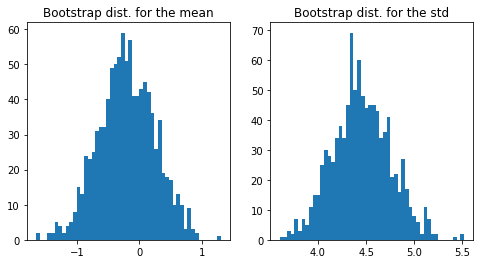

In [21]:
f, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].hist(mean_boot, bins=50);
ax[1].hist(np.sqrt(var_boot), bins=50);
ax[0].set_title('Bootstrap dist. for the mean')
ax[1].set_title('Bootstrap dist. for the std')


#### Note

In recent versions of the `astropy` module, there is an implementation of the bootstrap algorithm: 
```python 
from astropy.stats import bootstrap
bootsamp = bootstrap(x_sample, nboot)
mean_boot_apy = bootsamp.mean(axis=1)
std_boot_apy =  bootsamp.std(ddof=1, axis=1)
print('Bootstrap mean = %.2f , std= %.2f ' % (mean_boot_apy.mean(), std_boot_apy.mean() ))
```
You may *NOT* use it to solve exercises given in this lecture or at the exam (unless this is for checking your results). 

In [22]:
from astropy.stats import bootstrap
np.random.seed(123485)
bootsamp = bootstrap(x_sample, nboot)
mean_boot_apy = bootsamp.mean(axis=1)
std_boot_apy =  bootsamp.std(ddof=1, axis=1)
print('Bootstrap mean = %.3f , std= %.3f ' % (mean_boot_apy.mean(), std_boot_apy.mean() ))

Bootstrap mean = -0.206 , std= 4.454 


### II.5.1 Bootsrap confidence interval 

If we calculate a statistics $q$
There are many ways to derive confidence intervals using bootstrap: 

* -1.- **Normal Interval**: 
If you assume that your statistics follows a normal distribution (the interval is only accurate if this is true), 
$$
[\hat{q} - z_{\alpha/2} \, stde^B(q), \hat{q}+z_{\alpha2}\, stde^B (q)],
$$ 

where $\hat{\theta}$ is the estimator based on the original distribution, and $stde^B$ is the bootstrap standard error. 

Similarly, one can also use the student's distribution to estimate the confidence interval, hence replacing $z_{\alpha2}$ by $t_{\alpha/2}$ 


For a 95% normal confidence interval, you have:
$$
[\hat{q} - 1.96 \, stde^B(q), \hat{q} + 1.96 \, stde^B (q)],
$$

* -2.- **Percentile**: You simply take the $\alpha/2$, $1-\alpha/2$ percentiles of the distribution of your $q^*_i$:    

$$
[q^*_{\alpha/2}, q^*_{1-\alpha/2}]
$$

If the bootstrap replicates of $\hat{q}^{*}$ follow a normal distribution $N(\hat{q}, stde^B (q))$, this percentile interval works reasonably well in many situations. It has also the property to be invariant to monotone transformations of $q$ (i.e. $m(q)$). 

In `python`, if you have an array of values (such as the array containing your $q^*_i$), you can use the numpy function `np.percentile(array, p)` where $p$ is the p-percentile value. If you which to calculate 68% CI, then you will chose `p = [34./2, 100-34./2]`. 

* -3.- A third approach is the so-called "pivotal confidence intervals". Those are defined as:

$$
[2 \hat{q} - q^*_{1-\alpha/2}, 2 \hat{q} - q^*_{\alpha/2})],
$$

* Other approaches exist in the litterature. There is a little documented module [scikits.bootstrap](https://pypi.org/project/scikits.bootstrap/#description) for bootstrap confidence interval in python. Hence, you may need to develop your own functions for estimating bootstrap confidence interval. 

**Exercise**:

Calculate a 95% CI (i.e. the normal interval, the percentile interval and the pivotal interval) for the sample used in the previous exercise.

In [27]:
alpha = 0.05 
zalpha = 1.96 #(for a 95% CI)

hat_q = x_sample.mean()
print('Our mean mu_hat =  %.3f  ' % hat_q )

CIlow, CIhigh = x_sample.mean() - zalpha * stde_mu_from_boot, x_sample.mean() + zalpha * stde_mu_from_boot
print('Normal CI [%.3f , %.3f]' % (CIlow, CIhigh) )

# Percentile CI
ca1, ca2 = np.percentile(mean_boot, [2.5, 97.5])
print('Percentile CI : [%.3f, %.3f ]' %(ca1, ca2) )

# Pivot CI
print('Pivot CI : [%.3f, %.3f]' %(2*hat_q - ca2, 2*hat_q - ca1) )

Our mean mu_hat =  -0.218  
Normal CI [-1.101 , 0.664]
Percentile CI : [-1.094, 0.623 ]
Pivot CI : [-1.060, 0.658]


### II.5.2 Jacknife

The jacknife is a sort of bootstrap but in principle more robust (that claimed robustness gave it its name). The idea of the jacknife is to leave one observation aside for computing the statistic of interest. 

If $q_n$ is a statistical quantity estimated based on a sample of $n$ points. If we remove one data point, we can calculate $n$ times the statistics $q^*_i$ based on $n-1$ points (each time removing a *different* point).  
$q_{\infty}$ is the statistics we would have for an infinite sample. It can be shown (expanding $q_n$ as a series in $n^{-1}$, i.e. $q_n = q_{\infty} + n^{-1}\, q'_n+O(n^{-2})$ ; see [Lupton 1993](#LUP93)) that a bias corrected estimate $q^J$ can be computed as:

$$
q^J = q_n \, + \, \Delta\,q
$$

where $q_n$ is the estimator derived from the full sample and the jacknife correction $\Delta\,q$ is:

$$
\Delta \, q = (n-1)\, \left( q_n \, - \, \frac{1}{n}\, \sum_{i=1}^n \, q^*_i \right)
$$

Therefore, the bias-corrected estimate of q is simply:

$$
q^J = n \, q_n \, - \, (n-1) \, \bar{q}_n 
$$


In addition, if the estimator $q_n$ is asymptotically normal, then the variance for the jacknife estimate is:

$$
\sigma^2_q \, = \, \frac{n-1}{n} \sum^n_{i=1} (q^*_i \, - \, \bar{q}_n )^2
$$

with $\bar{q}_n = n^{-1} \, \sum^n_{i=1} \, q^*_i$  ($q^*_i$ is the stat where we have removed the $i$-th sample). The standard error $\hat{se}^J$ on the jacknife statisitcs $q^J$ is simply the sqrt of the variance $\sigma^2_q$.  

**Exercise**

For the same distribution as the one used in the bootstrap case, calculate the mean and standard error on the mean and compare to the bootstrap result.    
TIP: You can use `sample = np.delete(sample, index)` to remove `sample[index]` from sample.  

In [24]:
np.random.seed(1236)

# let's redo the bootstrap as well for comparison
nboot = 1000
mean_boot = np.zeros(nboot)
IQ_boot = np.zeros(nboot)  # I also add the interquartile
for i in range(nboot):
    bootsamp = np.random.choice(x_sample, size=npts, replace = True)
    mean_boot[i] = bootsamp.mean()
    IQ_boot[i] = np.percentile(bootsamp, 75) - np.percentile(bootsamp, 25)   

# stde on the mean from the bootstrap 
mu_boot = mean_boot.mean()
# stde_mu_boot = np.sqrt(np.sum( (mean_boot - mu_boot)**2 / (nboot-1)) )  # Explicit formula for the stde
stde_mu_boot = mean_boot.std(ddof=1)    

# Jacknife
njack = npts  # njack = number of time to resample ; maximum is npts = Number of points of the sample ! 
mean_jack = np.zeros(njack)
IQ_jack = np.zeros(njack)

for i in range(njack):
    jacksamp = x_sample.copy()
    jacksamp = np.delete(jacksamp, i)
    mean_jack[i] = np.mean(jacksamp)
    IQ_jack[i] = np.percentile(jacksamp, 75) - np.percentile(jacksamp, 25)

IQ_samp = np.percentile(x_sample, 75) - np.percentile(x_sample, 25)
xbar_jack = npts * np.mean(x_sample) - (npts-1) * np.mean(mean_jack) # Bias corrected value of the jacknife estimate
var_jack = ((npts-1) / npts) * np.sum( (mean_jack-xbar_jack)**2 )
stde_jack = np.sqrt(var_jack)

IQ_jack = npts * IQ_samp - (npts-1) * np.mean(IQ_jack)   # Apply a bias correction to the IQ of the jacknife

print('Jacknife Mean = %.3f, stde= %.3f'% (xbar_jack, stde_jack ) )
print('Bootstrap mean = %.3f, stde %.3f ' % (mean_boot.mean(), stde_mu_boot )  )
print('Sample mean and stde = %.3f,  %.3f ' %(np.mean(x_sample), np.std(x_sample, ddof=1)/np.sqrt(npts) ) )
print('Jacknife IQ = %.3f '% IQ_jack )
print('Bootstrap IQ = %.3f '% np.mean(IQ_boot) )

Jacknife Mean = -0.218, stde= 0.450
Bootstrap mean = -0.220, stde 0.442 
Sample mean and stde = -0.218,  0.450 
Jacknife IQ = 5.754 
Bootstrap IQ = 5.916 


In [25]:
pop_norm = scipy.stats.norm(0, 4)
i25, i75 = pop_norm.ppf((0.25, 0.75))
IQ = i75-i25
print('IQ = ', IQ)

IQ =  5.395918001568654


#### Note

In recent versions of the [astropy](https://docs.astropy.org/en/stable/api/astropy.stats.jackknife_stats.html) module, there is an implementation of the jacknife resampling and statistics: 
```python 
import astropy.stats 
# Create a jacknife resample
jack_sample = astropy.stats.jackknife_resampling(x_sample)
# jack_sample is an array of shape=(len(x_sample), len(x_sample) - 1 )

# Calculate a statistic of interest, including a CI at 95% confidence 
test_statistic = np.mean
estimate, bias, stderr, conf_interval = astropy.stats.jackknife_stats(x_sample, test_statistic, confidence_level=0.95)
print(estimate, bias, stderr, conf_interval)
```
You may *NOT* use it to solve exercises given in this lecture or at the exam (unless this is for checking your results). 

#### Note: Bayesian Jacknife 

A paper by Wilensky et al. (2022, [https://arxiv.org/abs/2210.17351](https://arxiv.org/abs/2210.17351) proposes a Bayesian jackknife test for assessing the probability that a data set contains biased subsets. It also enables one to identify which of the subsets is/are likely to be biased. The test can be used to assess the presence and likely source of statistical tension between different measurements of the same quantities in an automated manner. Under certain broadly applicable assumptions, the test is analytically tractable. The team provides an open source code, [CHIBORG](https://github.com/mwilensky768/chiborg), that performs both analytic and numerical computations of the test on general Gaussian-distributed data.

In [26]:
import astropy.stats 
# Create a jacknife resample
jack_sample = astropy.stats.jackknife_resampling(x_sample)
# jack_sample is an array of shape=(len(x_sample), len(x_sample) - 1 )

# Calculate a statistic of interest, including a CI at 95% confidence 
test_statistic = np.mean
estimate, bias, stderr, conf_interval = astropy.stats.jackknife_stats(x_sample, test_statistic, confidence_level=0.95)
print(estimate, bias, stderr, conf_interval)

-0.218150828526127 5.495603971894525e-15 0.45005685990425637 [-1.10024606  0.66394441]


## Summary

- You have learned 2 different techniques to calculate standard errors and confidence intervals for a statistics of a sample: the `bootstrap` and the `jacknife`. 
- The key concept of the bootstrap is that you generate fake samples (called bootstrap samples) based on the sample in hands (randomly picking elements from the original sample, *allowing for repetion*), and study the distribution of the statistic of interest based on this bootstrap sample. 
- The key concept of the jacknife consists in creating fakes samples (called jacknife samples), each jacknife being sample being the same as the original one, but with one point removed. The statistics of interest can be derived from this ensemble of jacknife samples (the mean and variance of the sample are derived using specific formula given in [II.5.2-Jacknife](#II.5.2-Jacknife)). 
- Since this method yields a distribution of the statistics of interest, it is possible to calculate a confidence interval based on the bootstrap of on the jacknife distributions. Bootstrap/Jacknife are particularly useful when the central limit theorem does not apply, or the statistics of interest is not the mean. 
- Three ways to calculate a confidence interval from a bootstrap sample of a specific statistics have been presented: the "normal interval" (assuming the distribution is gaussian), the "percentile interval", and the "Pivotal confidence interval".  
- We can use the function `np.percentile()` to calculate a confidence interval for an array containing a statistic of interest (e.g. a bootstraped mean; or any array containing multiple realisation of a statistic of interest). 
- The maximum size of the bootstrap sample is given by $n!/n^n$, where $n$ is the number of points of the sample. 
- The package `astropy.stats` provides an implementation of the bootstrap and of the jacknife resampling. Those implementations can be used in real life but not to solve the problems given in this lecture (or at the exam). 

## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* A good recap of the concepts that we have seen in the previous lectures:  https://towardsdatascience.com/https-medium-com-aparnack-what-can-a-small-sample-teach-us-about-a-big-population-part-1-b7c048c22bf2 

Other useful references to know more about the topics covered in this lecture: 

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.

- Bootstrap: A. C. Davison, D. V. Hinkley and G. A. Young, Statistical science, 2003, 18, 2, 141: Recent Developments in Bootstrap Methodology https://projecteuclid.org/journals/statistical-science/volume-18/issue-2/Recent-Developments-in-Bootstrap-Methodology/10.1214/ss/1063994969.full 
    
- Fisher matrices and confidence ellipses (Not covered in this lecture): Coe 2009 https://arxiv.org/abs/0906.4123    

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.
